In [37]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score



from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,f1_score,roc_curve, roc_auc_score
!pip install xlrd

In [43]:
data=pd.read_excel('default of credit card clients.xls',header=1)

In [47]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [49]:
# Dataset Rows & Columns count
data.shape


(30000, 25)

In [51]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [53]:

data[data.duplicated()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [55]:
# Missing Values/Null Values Count
data[data.isna()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [57]:
# Dataset Columns
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [59]:
# Dataset Describe
data.describe(include='all')
     

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [61]:
#converting all 0,4,5,6 value on education to 4
data['EDUCATION']=data['EDUCATION'].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

#Converting 0 in marriage to 3
data['MARRIAGE']=data['MARRIAGE'].map({0:3,1:1,2:2,3:3})

#Function to divide limit column into categorical variable for visualization
def limit_cat(x):
  if x >240000:
    return 'Above 240000'
  elif x >140000 :
    return 'Between 140000-240000'
  elif x >10000:
    return 'Between 10000-140000'
  else:
    return

#Function for dividing age column into categorical variable for visualization
def age_cat(x):
  if x >45:
    return 'Above 45'
  elif x > 35:
    return '35-45'
  else:
    return '21-35'

#creating new categorical variable.
data['Limit_cat'] = data['LIMIT_BAL'].apply(lambda x:limit_cat(x))

#creating new categorical variable.
data['Age_cat'] = data['AGE'].apply(lambda x: age_cat(x))

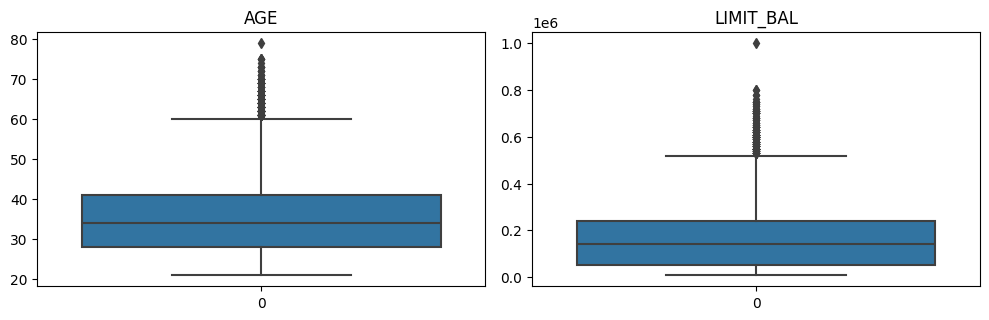

In [63]:
# checking Outliers with seaborn boxplot

plt.figure(figsize=(10,6))
n=0
for i in ['AGE','LIMIT_BAL']:
  if n<10:
    n=n+1
  plt.subplot(2,2,n)
  sns.boxplot(data[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

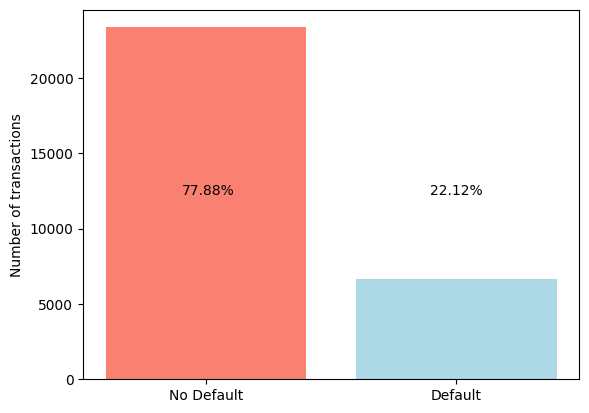

In [69]:
#Calculating percentage of defaulters and non defaulters
classes=data['default payment next month'].value_counts()
not_default=classes[0]/data['default payment next month'].count()*100
defaulter=classes[1]/data['default payment next month'].count()*100


#Barplot of percentage of defaulters vs non defaulters.
plt.bar(['No Default','Default'], classes, color=['salmon','lightblue'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(not_default),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(defaulter),(0.7, 0.5), xycoords='axes fraction')
plt.show()

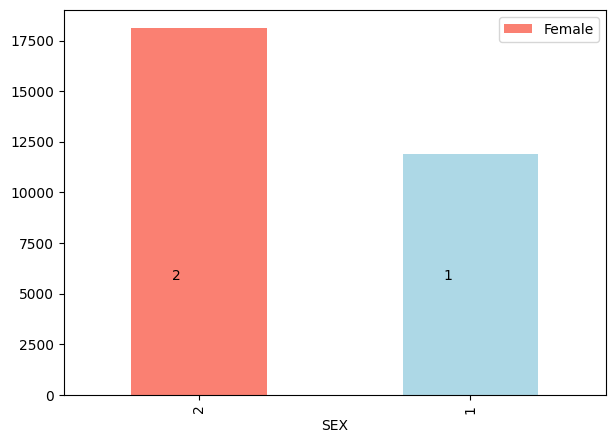

In [71]:
#Barplot of number of Male vs Female customers
data['SEX'].value_counts().plot(kind="bar",figsize=(7,5),color=['salmon','lightblue'])

#Calculating annotated vales
sex_df=data['SEX'].value_counts().reset_index()
female=sex_df['SEX'][0]
male=sex_df['SEX'][1]
plt.annotate("{}".format(female),(0.2, 0.3), xycoords='axes fraction')
plt.annotate("{}".format(male),(0.7, 0.3), xycoords='axes fraction')
plt.legend(['Female','Male'])
plt.show()

<Axes: ylabel='Frequency'>

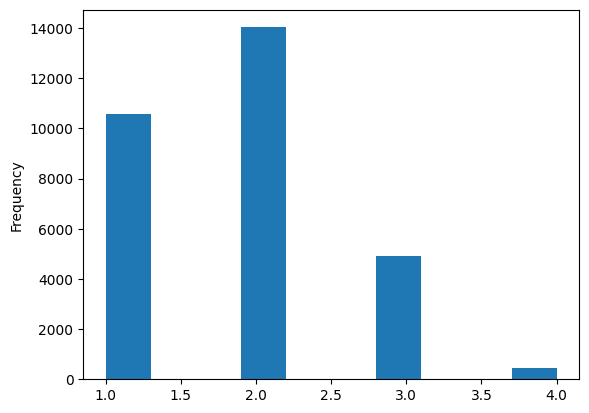

In [73]:

#Bargraph showing number of customer as per education.
data.EDUCATION.plot.hist()

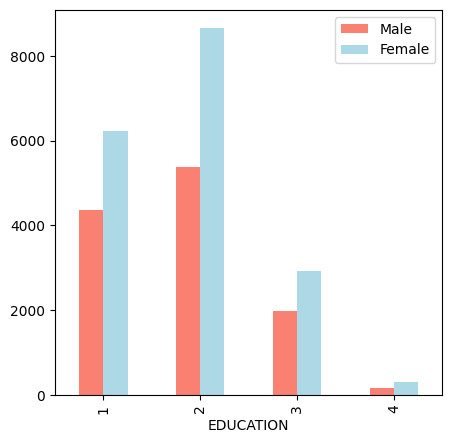

In [75]:

#Gender wise distribution of number of customer by education.
data.groupby('EDUCATION')['SEX'].value_counts().unstack().plot(kind="bar",figsize=(5,5),color=['salmon','lightblue'])
plt.legend(['Male','Female'])
plt.show()

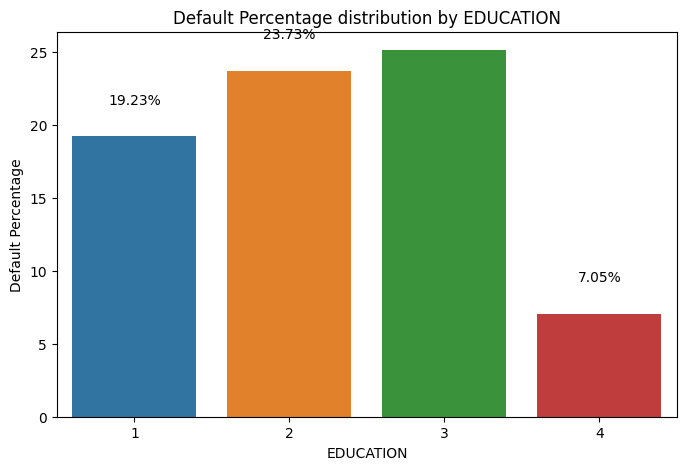

In [83]:
# Group the data by EDUCATION and calculate the default count per education level
df = data.groupby("EDUCATION")['default payment next month'].agg(['sum', 'count']).reset_index()

# Calculate the default percentage
df['Default Percentage'] = (df['sum'] / df['count']) * 100
# Plot the bar graph
fig = plt.subplots(figsize=(8, 5))
sns.barplot(x='EDUCATION', y='Default Percentage', data=df).set_title('Default Percentage distribution by EDUCATION')

# Annotate the bar graph with the percentages
for i in range(len(df)):
    plt.annotate(f"{df['Default Percentage'][i]:.2f}%", 
                 (i, df['Default Percentage'][i] + 2), 
                 ha='center', va='bottom')

plt.show()

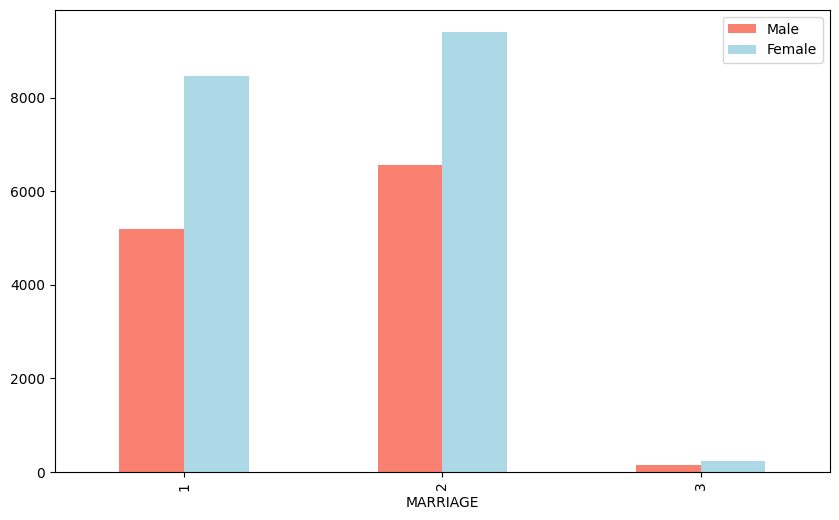

In [87]:

#Bargraph showing number of customers as per their maritial status
data.groupby('MARRIAGE')['SEX'].value_counts().unstack().plot(kind="bar",figsize=(10,6),color=['salmon','lightblue'])
plt.legend(['Male','Female'])
plt.show()
     

C:\Users\user\AppData\Local\Temp\ipykernel_22724\3592193625.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '99.94' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Default Percentage'][i]=round(df['Default Percentage'][i]/(df['Default Percentage'][i]+data['MARRIAGE'].value_counts().reset_index()['MARRIAGE'][i]),4)*100


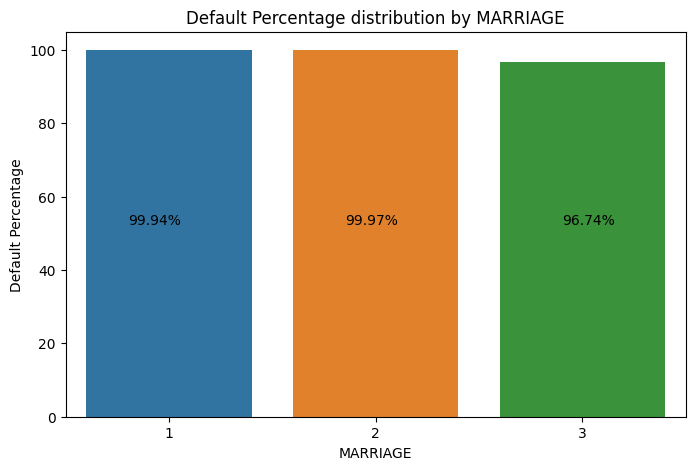

In [93]:

#Bargraph showing default percentage as per their mariatial status.
data['MARRIAGE'].value_counts()
df=data.groupby('MARRIAGE')['default payment next month'].sum().reset_index()
df.rename(columns = {'default payment next month':'Default Percentage'}, inplace = True)
for i in range(data['MARRIAGE'].nunique()):
    df['Default Percentage'][i]=round(df['Default Percentage'][i]/(df['Default Percentage'][i]+data['MARRIAGE'].value_counts().reset_index()['MARRIAGE'][i]),4)*100
#for plotting bar graph
fig = plt.subplots(figsize=(8,5))
sns.barplot(x ='MARRIAGE',y ='Default Percentage',data = df).set_title('Default Percentage distribution by MARRIAGE')
for i in range(df['Default Percentage'].nunique()):
   plt.annotate("{0:.4}%".format(df['Default Percentage'][i]),(0.1+i*0.35, 0.5), xycoords='axes fraction')

#plt.legend(df[x])
plt.show()

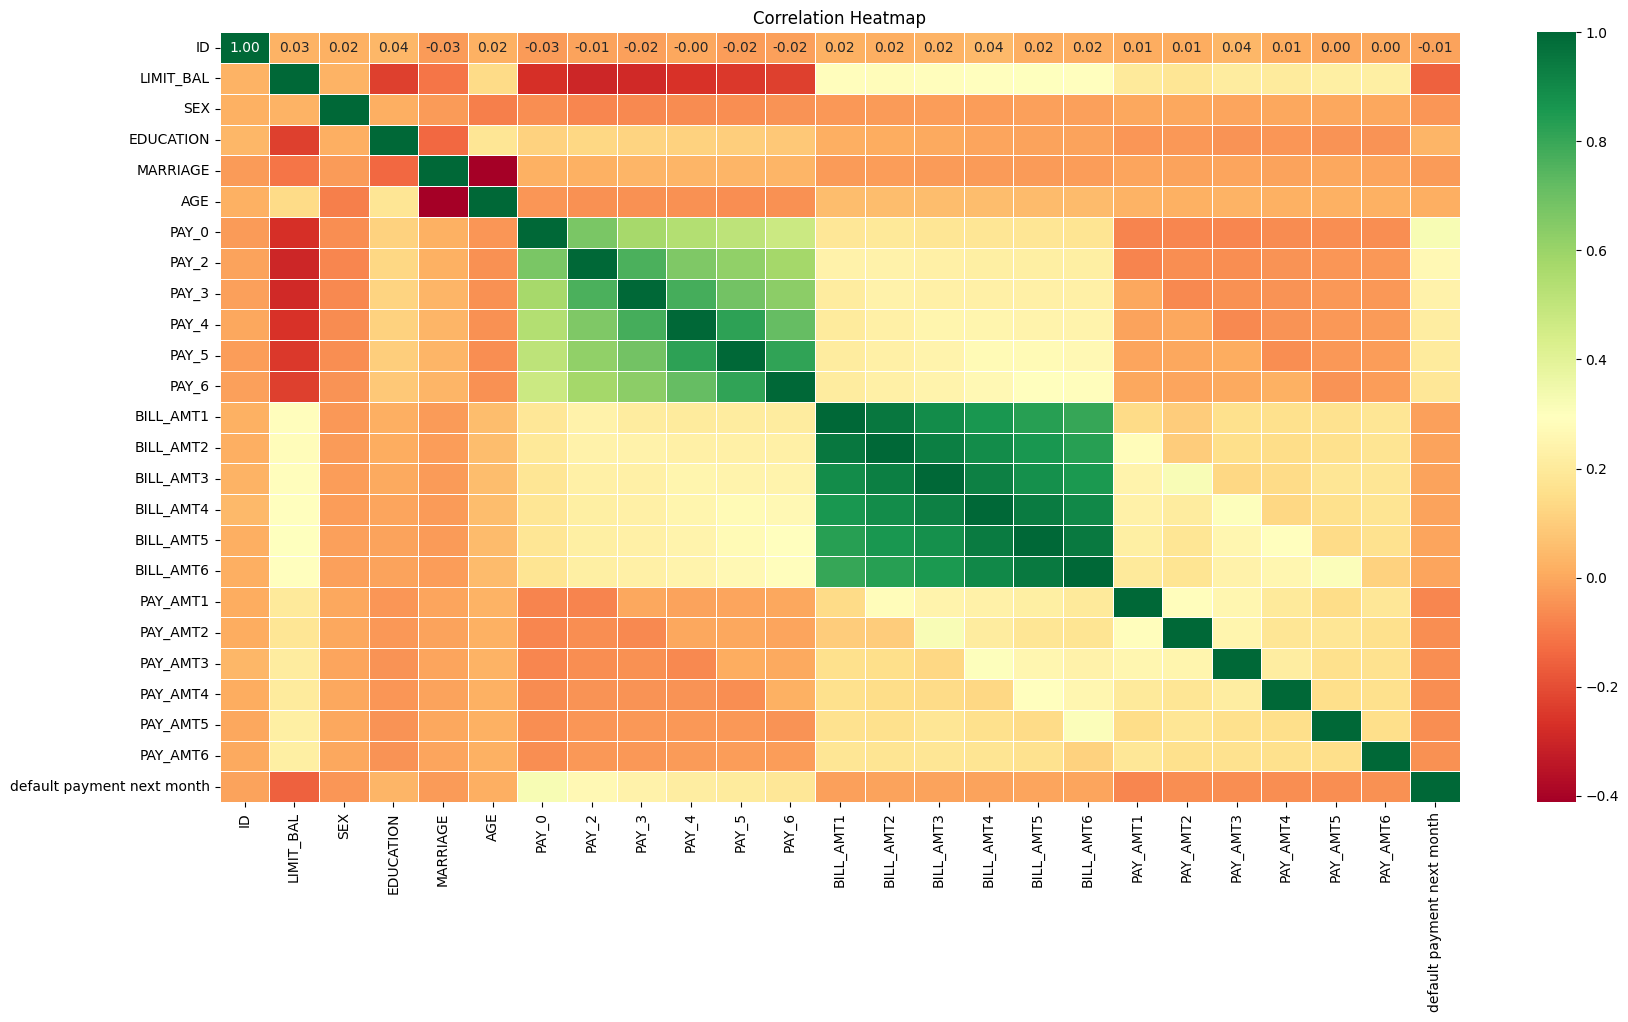

In [105]:

# Correlation Heatmap visualization code
numeric_data = data.select_dtypes(include=['number'])
corrmat = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, annot=True, linewidths=0.5, fmt='.2f', cmap="RdYlGn")

plt.title('Correlation Heatmap')
plt.show()
     

In [107]:
#HYPOTHESIS TESTING

#H0(null hypothesis): There is no significant difference in the age with respect to default payment next month.

#H1(alternate hypothesis): There is significant difference in the age with respect to default payment next month.

In [111]:
from scipy.stats import ttest_ind

default=data[data['default payment next month']==1]
not_default=data[data['default payment next month']==0]

p_val= ttest_ind(default['AGE'],not_default['AGE']).pvalue
print(p_val)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

0.016136845890163832
We are rejecting null hypothesis


In [115]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(data['default payment next month'], data['EDUCATION'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')
     

We are rejecting null hypothesis


In [117]:
#H0(null hypothesis): There is no significant dependency between the default payment next month and marital status.

#H1(alternate hypothesis): There is significant dependency between the default payment next month and marital status.

In [121]:
# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(data['default payment next month'], data['MARRIAGE'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


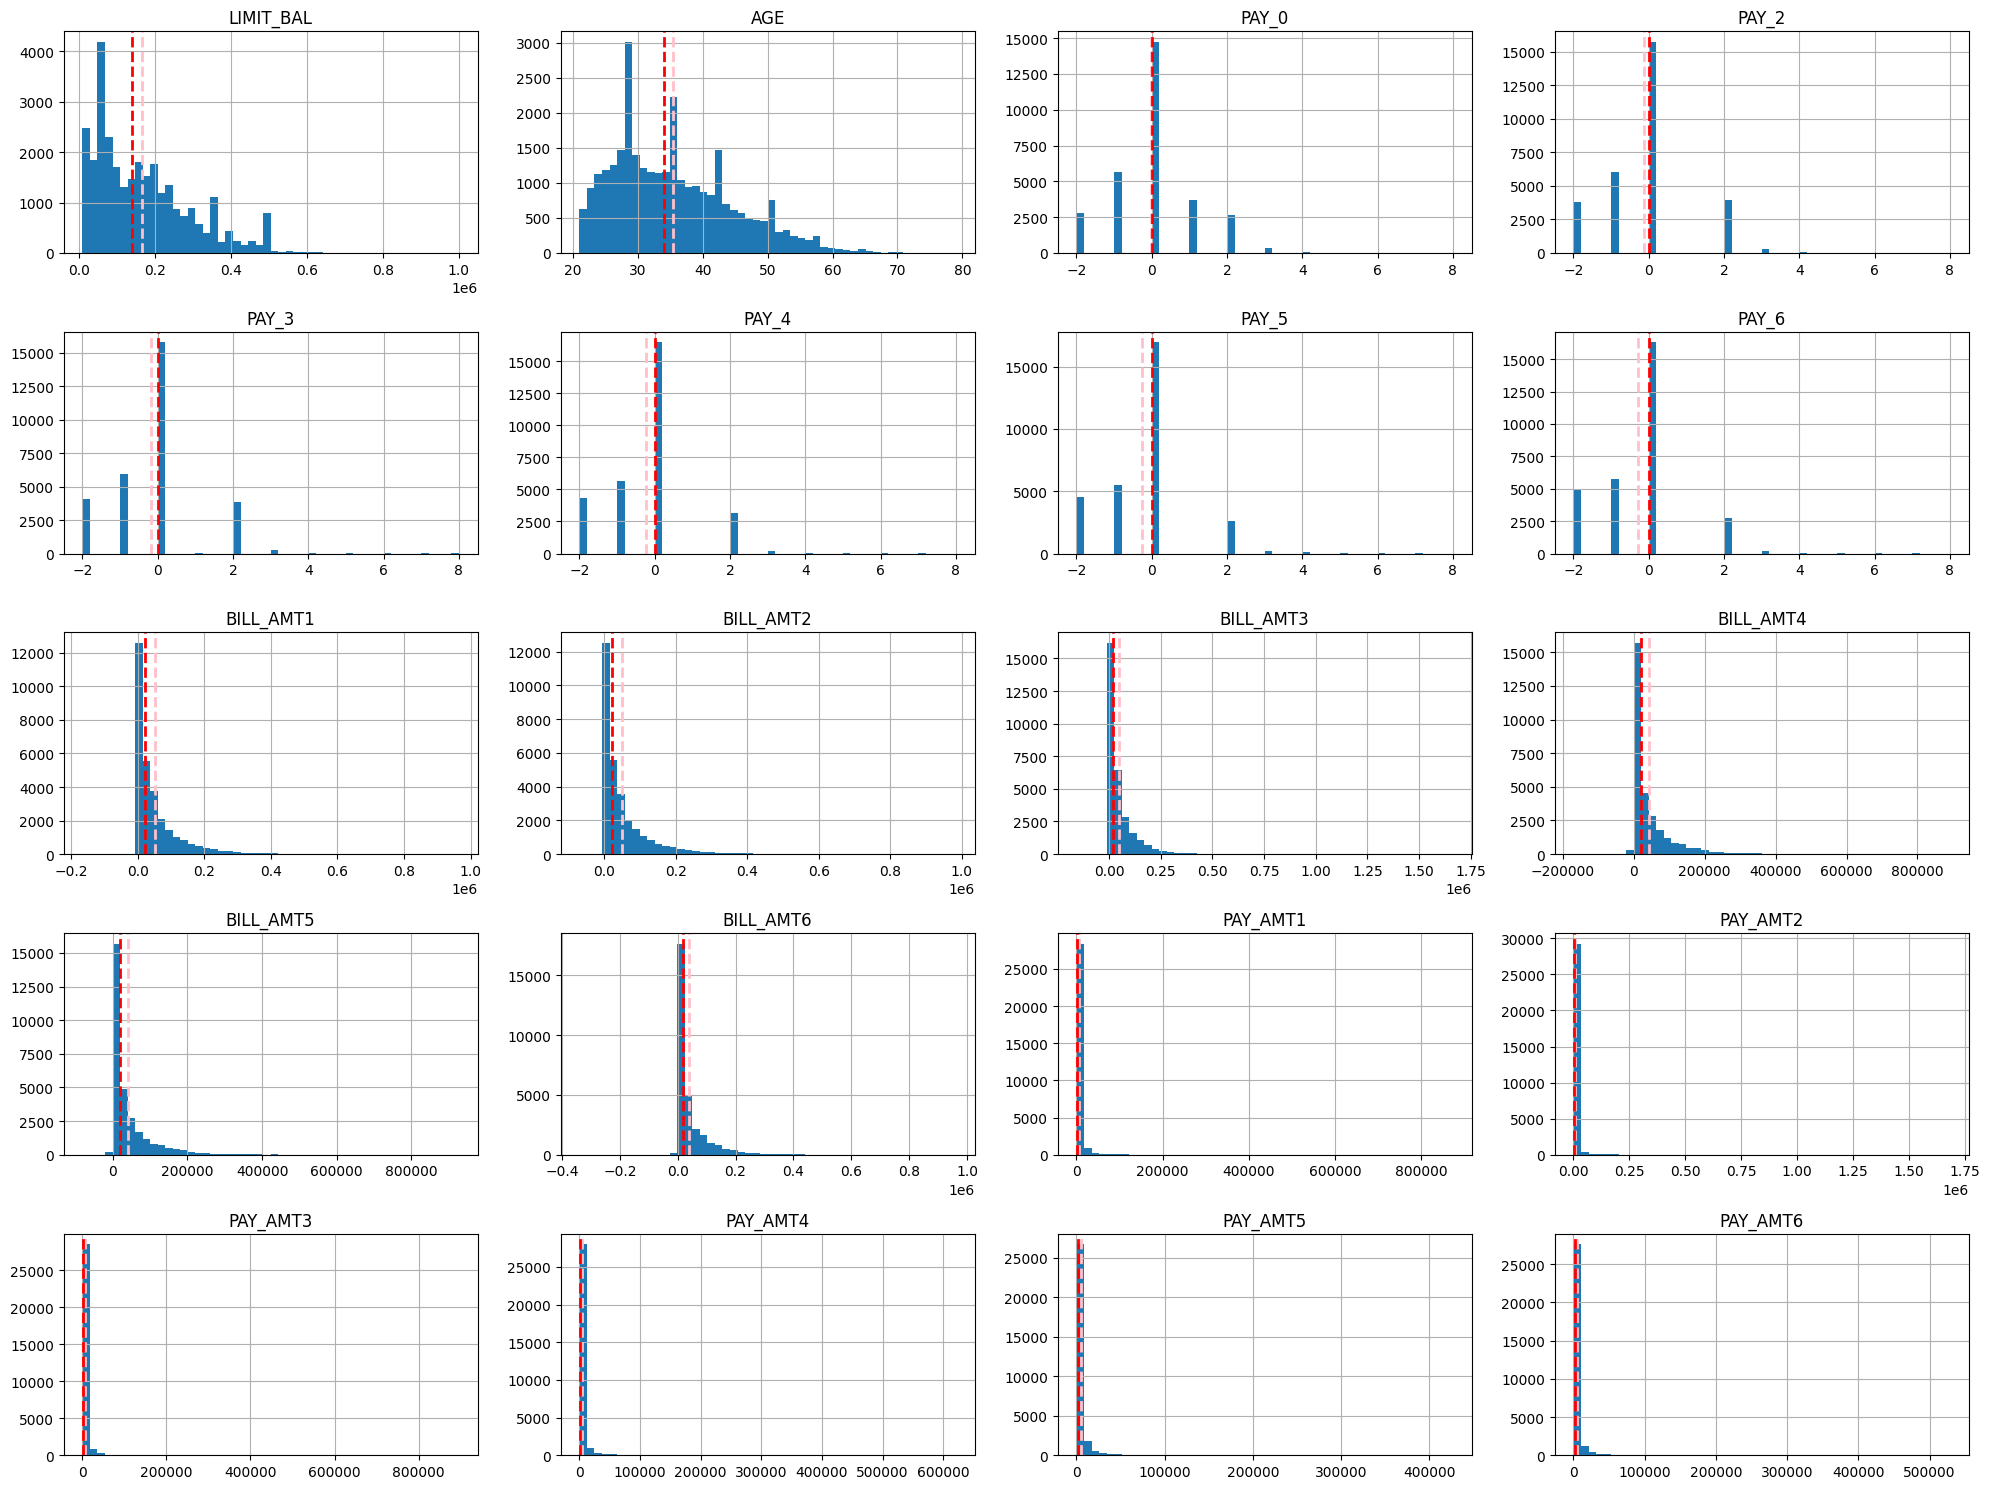

In [126]:
#Checking for distribution of data using histogram
numeric_col = ['LIMIT_BAL', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
rows=5
cols=4
counter=1
fig = plt.figure(figsize=(20,15))
for col in numeric_col:
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  data[col].hist(bins=50, ax = ax)
  ax.axvline(data[col].mean(), color = 'pink',linestyle='dashed', linewidth=2)
  ax.axvline(data[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

In [128]:
scaler = MinMaxScaler()
data[numeric_col]= scaler.fit_transform(data[numeric_col])

DATA SPLITTING

In [135]:
X=data.drop(['default payment next month','Limit_cat','Age_cat','ID'],axis=1)#Dropping categorical variable created during feature engineering
y=data['default payment next month']


# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
     

(24000, 23)
(6000, 23)
(24000,)
(6000,)


In [139]:
train_scaler = StandardScaler()
test_scaler=StandardScaler()

#Fit on data
X_scaled=train_scaler.fit_transform(X)
X_train_scaled=train_scaler.fit_transform(X_train)
X_test_scaled=test_scaler.fit_transform(X_test)

#converting scaled data into dataframe
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns,index=X.index)
X_scaled_train_df=pd.DataFrame(data=X_train_scaled,columns=X_train.columns,index=X_train.index)
X_scaled_test_df=pd.DataFrame(data=X_test_scaled,columns=X_test.columns,index=X_test.index)

In [141]:
X_scaled_df.head(2)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878


ML MODELS Selection

Comparing the models with default hyperparameter values using Cross Validation

In [144]:
models=[LogisticRegression(max_iter=1000), SVC(kernel='linear'),KNeighborsClassifier(), RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=4)]
     


In [148]:
def compare_models_cross_validation():
  model_scores={}

  for model in models:

    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('x-----x-----x------x------x')

In [150]:
compare_models_cross_validation()


Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.808125   0.81270833 0.80395833 0.80416667 0.80708333]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 80.72 %
x-----x-----x------x------x
Cross Validation accuracies for the SVC(kernel='linear') = [0.80770833 0.785625   0.80791667 0.80520833 0.80645833]
Acccuracy score of the  SVC(kernel='linear') = 80.26 %
x-----x-----x------x------x
Cross Validation accuracies for the KNeighborsClassifier() = [0.78520833 0.79583333 0.79645833 0.790625   0.790625  ]
Acccuracy score of the  KNeighborsClassifier() = 79.18 %
x-----x-----x------x------x
Cross Validation accuracies for the RandomForestClassifier(criterion='entropy', n_estimators=4, random_state=0) = [0.79166667 0.80479167 0.795625   0.78958333 0.801875  ]
Acccuracy score of the  RandomForestClassifier(criterion='entropy', n_estimators=4, random_state=0) = 79.67 %
x-----x-----x------x------x


In [152]:
models={

   'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
   'Support Vector':SVC(),
    'Random Forest':RandomForestClassifier(criterion='entropy', n_estimators=4, random_state=0)


}

In [154]:
#Create function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):

  models_trained={}
  model_scores={}
  clf_report={}


  for name, model in models.items():
    model=model.fit(X_train,y_train)
    models_trained[name]=model

    model_scores[name]=model.score(X_test,y_test)

    y_preds=model.predict(X_test)

    clf_report[name]=classification_report(y_test,y_preds)

  model_compare=pd.DataFrame(model_scores,index=['accuracy'])


  return model_scores,model_compare,clf_report, models_trained

In [156]:
#Model implementation using function
scores=fit_and_score(models=models,X_train=X_scaled_train_df,X_test=X_scaled_test_df,y_train=y_train,y_test=y_test)

In [158]:
#Printing accuracy score of all the models
pd.DataFrame([scores[0]]).rename(index={0: 'Score'})

,Logistic Regression,KNN,Support Vector,Random Forest
Score,0.820833,0.790833,0.825833,0.799333


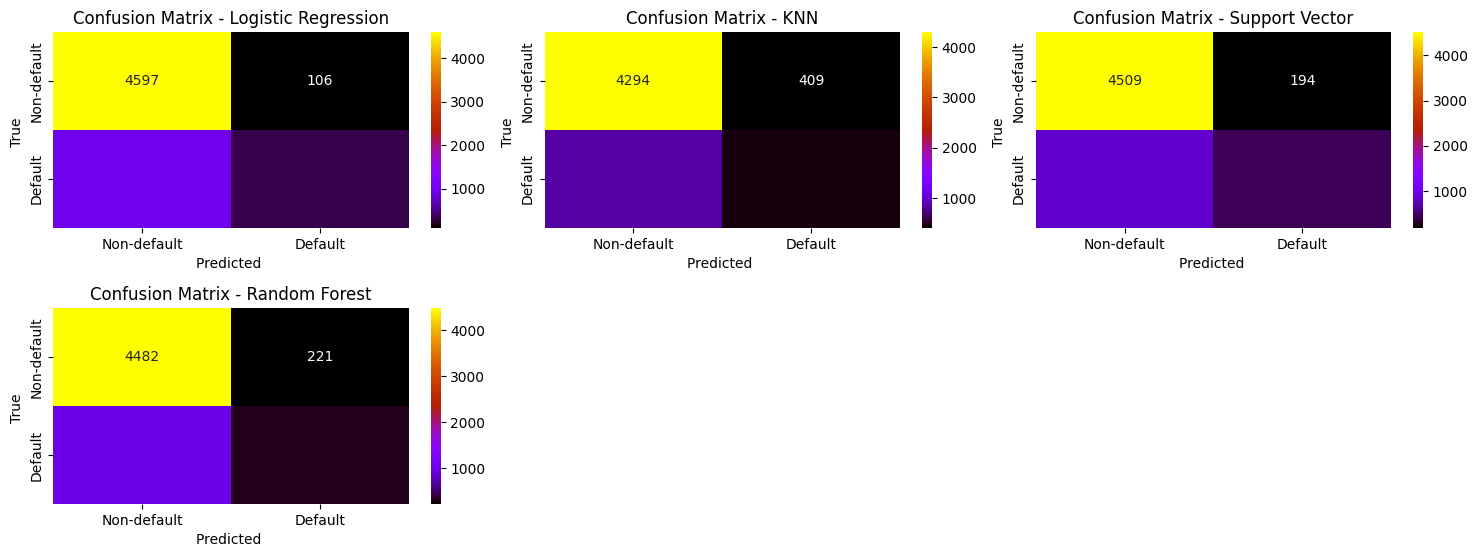

In [186]:
#Confusion matrix for all the implemented models
rows=3
cols=3
count=1
fig = plt.figure(figsize=(15,8))
for ind,key in enumerate(scores[3].keys()):
    y_score = scores[3][key].predict(X_scaled_test_df)
    ConfMatrix = confusion_matrix(y_test,y_score)
    plt.subplot(rows,cols,count)
    sns.heatmap(ConfMatrix,annot=True, cmap="gnuplot", fmt="d", xticklabels = ['Non-default', 'Default'], yticklabels = ['Non-default', 'Default'])
    plt.ylabel('True ')
    plt.xlabel('Predicted ')
    plt.title(f"Confusion Matrix - {key}")
    count=count+1
    plt.tight_layout()

In [190]:
#Printing classification report of all implemented models
for key in scores[2].keys():
  print(f'{key}:\n----------------------------------------------------- \n------------------------------------------------------\n{scores[2][key]}')

Logistic Regression:
----------------------------------------------------- 
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      4703
           1       0.76      0.25      0.38      1297

    accuracy                           0.82      6000
   macro avg       0.79      0.62      0.64      6000
weighted avg       0.81      0.82      0.78      6000

KNN:
----------------------------------------------------- 
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4703
           1       0.52      0.35      0.42      1297

    accuracy                           0.79      6000
   macro avg       0.68      0.63      0.65      6000
weighted avg       0.77      0.79      0.77      6000

Support Vector:
----------------------------------------------------- 
-----------------------------